In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix,plot_decision_regions
from sklearn.linear_model import LogisticRegression

In [2]:
# load dataset
dataset_pro = pd.read_csv('data.csv')
print(dataset_pro)

     openness_1  conscientiousness_1  extroversion_1  agreeableness_1   
0          1.67                 3.00            5.33             3.00  \
1          5.67                 4.00            3.67             4.67   
2          5.33                 3.33            3.33             5.00   
3          6.00                 3.33            3.67             3.33   
4          1.00                 5.00            3.00             5.00   
..          ...                  ...             ...              ...   
221        2.80                 2.30            3.00             3.50   
222        2.60                 3.40            2.40             2.20   
223        1.70                 2.00            1.80             1.00   
224        2.70                 1.60            1.10             2.30   
225        1.30                 2.70            2.80             1.80   

     neuroticism_1  anxietybasedperformancedeficits_1   
0             3.00                               1.43  \
1        

In [3]:
dataset_pro.head()

,openness_1,conscientiousness_1,extroversion_1,agreeableness_1,neuroticism_1,anxietybasedperformancedeficits_1,exaggeratedsafetybehavior_1,hostilebehaviors_1,Gender_1,Age_1,violations_1
0,1.67,3.00,5.33,3.00,3.00,1.43,1.57,1.86,1,1,1
1,5.67,4.00,3.67,4.67,4.00,2.86,3.43,3.57,1,1,2
2,5.33,3.33,3.33,5.00,3.67,3.43,4.71,4.57,2,1,2
3,6.00,3.33,3.67,3.33,4.33,3.00,3.71,4.43,2,2,1
4,1.00,5.00,3.00,5.00,5.00,3.71,3.00,2.71,1,3,2


In [4]:
dataset_pro.shape

(226, 11)

In [5]:
dataset_pro.describe()

,openness_1,conscientiousness_1,extroversion_1,agreeableness_1,neuroticism_1,anxietybasedperformancedeficits_1,exaggeratedsafetybehavior_1,hostilebehaviors_1,Gender_1,Age_1,violations_1
count,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000
mean,3.677434,3.657832,3.625044,3.812522,3.613451,3.057080,3.507257,3.550354,1.495575,1.632743,1.491150
std,1.836930,1.375534,1.319078,1.473252,1.381427,1.556259,1.512513,1.468598,0.501090,0.784624,0.501031
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.860000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.925000,3.000000,3.000000,3.000000,1.860000,2.290000,2.290000,1.000000,1.000000,1.000000
50%,3.500000,3.400000,3.330000,3.500000,3.330000,2.830000,3.430000,3.570000,1.000000,1.000000,1.000000
75%,5.322500,4.670000,4.457500,4.950000,4.575000,4.075000,4.482500,4.570000,2.000000,2.000000,2.000000
max,7.000000,7.000000,7.000000,7.000000,6.900000,6.900000,6.900000,6.900000,2.000000,3.000000,2.000000


In [6]:
dataset_pro['violations_1'].value_counts()

violations_1
1    115
2    111
Name: count, dtype: int64

In [7]:
dataset_pro['Gender_1'].value_counts()

Gender_1
1    114
2    112
Name: count, dtype: int64

In [8]:
dataset_pro['Age_1'].value_counts()

Age_1
1    126
2     57
3     43
Name: count, dtype: int64

1 = No , 2= Yes

<Axes: xlabel='Gender_1', ylabel='count'>

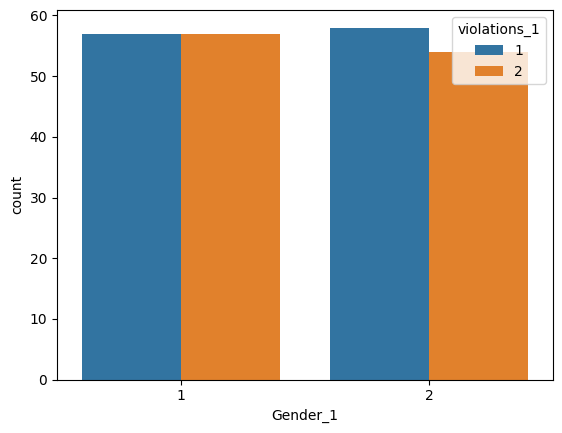

In [9]:
sns.countplot(x='Gender_1',hue='violations_1',data=dataset_pro)

<Axes: xlabel='Age_1', ylabel='count'>

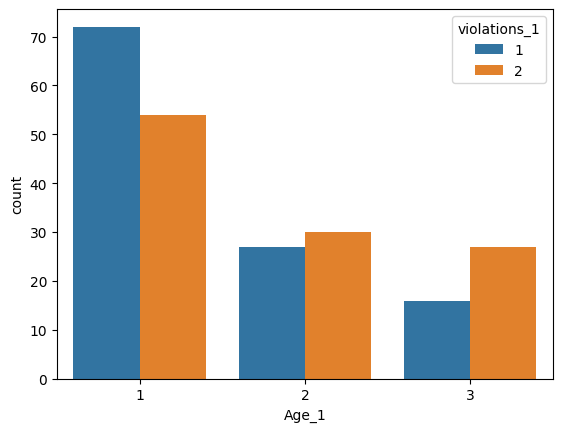

In [10]:
sns.countplot(x='Age_1',hue='violations_1',data=dataset_pro)

In [11]:
#sepearating the data and labels
X= dataset_pro[['openness_1','conscientiousness_1','extroversion_1','agreeableness_1','neuroticism_1','anxietybasedperformancedeficits_1','exaggeratedsafetybehavior_1','hostilebehaviors_1']]
Y= dataset_pro['violations_1']
print(X)
print(Y)

     openness_1  conscientiousness_1  extroversion_1  agreeableness_1   
0          1.67                 3.00            5.33             3.00  \
1          5.67                 4.00            3.67             4.67   
2          5.33                 3.33            3.33             5.00   
3          6.00                 3.33            3.67             3.33   
4          1.00                 5.00            3.00             5.00   
..          ...                  ...             ...              ...   
221        2.80                 2.30            3.00             3.50   
222        2.60                 3.40            2.40             2.20   
223        1.70                 2.00            1.80             1.00   
224        2.70                 1.60            1.10             2.30   
225        1.30                 2.70            2.80             1.80   

     neuroticism_1  anxietybasedperformancedeficits_1   
0             3.00                               1.43  \
1        

In [12]:
#Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, train_size=None, stratify=None,shuffle=True, random_state=2)

In [13]:
print(X.shape, X_train.shape, X_test.shape)

(226, 8) (180, 8) (46, 8)


SVM Model

In [14]:
#Training the model
classifier= SVC(C=100.0, gamma=1)
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(C=100.0, gamma=1)

In [15]:
#Model Evaluation

# accuracy score on the training data
x_pred = classifier.predict(X_train)
print(x_pred)
svm_train_accuracy = accuracy_score(x_pred, Y_train)
print('Accuracy score of the training data : ', svm_train_accuracy)

# accuracy score on the test data
y_pred = classifier.predict(X_test)
print(y_pred)
svm_test_accuracy = accuracy_score(y_pred, Y_test)
print('Accuracy score of the test data : ', svm_test_accuracy)

[2 2 2 1 1 2 1 1 1 1 1 2 1 2 2 1 2 1 2 2 2 1 1 2 2 2 2 2 2 1 1 2 2 1 1 1 1
 2 1 1 2 2 2 1 1 2 2 2 2 1 1 2 1 2 2 1 2 1 1 2 1 2 2 2 1 2 1 1 1 2 2 1 2 2
 1 1 2 2 1 2 2 2 2 1 2 1 2 1 1 1 1 2 1 1 2 2 1 1 1 2 2 2 1 2 1 1 2 2 1 1 2
 1 2 1 1 1 2 2 2 1 1 2 1 2 1 2 1 2 2 2 1 2 2 2 1 1 2 2 2 1 1 2 2 2 1 1 1 1
 2 1 1 1 1 1 2 1 2 1 1 1 1 1 2 2 1 1 2 2 2 1 1 1 2 1 2 2 1 1 1 1]
Accuracy score of the training data :  1.0
[1 2 2 1 1 1 1 2 1 2 1 1 1 2 1 2 2 1 1 1 1 2 2 2 2 1 2 2 1 2 2 2 1 1 1 1 2
 1 2 1 1 1 1 1 2 2]
Accuracy score of the test data :  0.717391304347826


[[92  0]
 [ 0 88]]


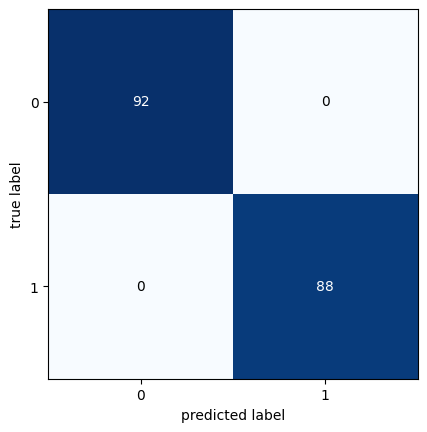

In [16]:
# print confusion matrix for SVM training data
cm11 = confusion_matrix(Y_train,x_pred)
print(cm11)
# plot confusion matrix for SVM training data
plot_confusion_matrix(cm11)
plt.show()

[[18  5]
 [ 8 15]]


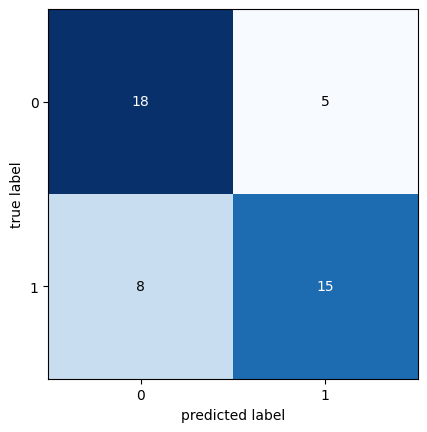

In [17]:
# print confusion matrix for SVM test data
cm12 = confusion_matrix(Y_test,y_pred)
print(cm12)

# plot confusion matrix for SVM test data
plot_confusion_matrix(cm12)
plt.show()

In [18]:
# Calculate precision
precision = cm12[0][0] / (cm12[0][0] + cm12[0][1])
print("Precision value of SVM:", precision)

# Calculate recall
recall = cm12[0][0] / (cm12[0][0] + cm12[1][0])
print("Recall value of SVM:", recall)

# Calculate F1 score
f1 = 2 * (precision * recall) / (precision + recall)
print("F1 Score value of SVM:", f1)

Precision value of SVM: 0.782608695652174
Recall value of SVM: 0.6923076923076923
F1 Score value of SVM: 0.7346938775510203


random forest

In [19]:
# Training the model and evaluation
rf_Model=RandomForestClassifier(oob_score=True)
rf_Model.fit(X_train,Y_train)
rf_Model.oob_score_
print (f'Train Accuracy - : {rf_Model.score(X_train,Y_train):.3f}')
print (f'Test Accuracy - : {rf_Model.score(X_test,Y_test):.3f}')

Train Accuracy - : 1.000
Test Accuracy - : 0.696


[2 2 2 1 1 2 1 1 1 1 1 2 1 2 2 1 2 1 2 2 2 1 1 2 2 2 2 2 2 1 1 2 2 1 1 1 1
 2 1 1 2 2 2 1 1 2 2 2 2 1 1 2 1 2 2 1 2 1 1 2 1 2 2 2 1 2 1 1 1 2 2 1 2 2
 1 1 2 2 1 2 2 2 2 1 2 1 2 1 1 1 1 2 1 1 2 2 1 1 1 2 2 2 1 2 1 1 2 2 1 1 2
 1 2 1 1 1 2 2 2 1 1 2 1 2 1 2 1 2 2 2 1 2 2 2 1 1 2 2 2 1 1 2 2 2 1 1 1 1
 2 1 1 1 1 1 2 1 2 1 1 1 1 1 2 2 1 1 2 2 2 1 1 1 2 1 2 2 1 1 1 1]
[[92  0]
 [ 0 88]]


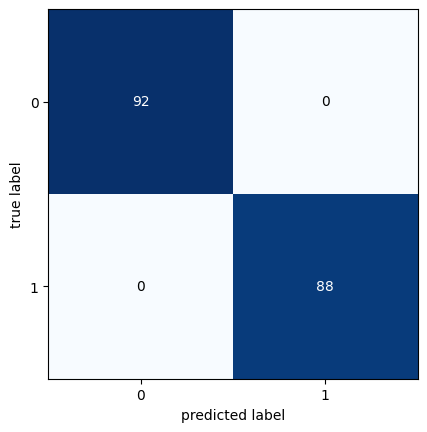

In [20]:
x_predct = rf_Model.predict(X_train)
print(x_predct)

# print confusion matrix for Random forest training data
cm21 = confusion_matrix(Y_train,x_predct)
print(cm21)

# plot confusion matrix for Random forest training data
plot_confusion_matrix(cm21)
plt.show()


[2 2 2 1 2 1 1 1 1 2 1 1 1 2 1 2 2 1 1 1 2 2 2 1 2 2 2 2 1 2 2 2 1 1 2 1 2
 2 2 1 1 1 1 2 2 2]
[[15  8]
 [ 6 17]]


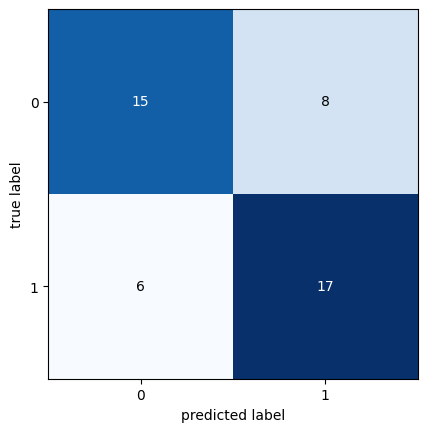

In [21]:
y_predct = rf_Model.predict(X_test)
print(y_predct)

# print confusion matrix of Random forest test data
cm22 = confusion_matrix(Y_test,y_predct)
print(cm22)

# plot confusion matrix of Random forest test data
plot_confusion_matrix(cm22)
plt.show()

In [22]:
# Calculate precision
precision = cm22[0][0] / (cm22[0][0] + cm22[0][1])
print("Precision value of Random Forest:", precision)

# Calculate recall
recall = cm22[0][0] / (cm22[0][0] + cm22[1][0])
print("Recall value of Random Forest:", recall)

# Calculate F1 score
f1 = 2 * (precision * recall) / (precision + recall)
print("F1 Score value of Random Forest:", f1)

Precision value of Random Forest: 0.6521739130434783
Recall value of Random Forest: 0.7142857142857143
F1 Score value of Random Forest: 0.6818181818181819


Logistic Regression

In [23]:
# training and evaluating model
model = LogisticRegression()
model.fit(X_train, Y_train)

# make predictions on train set
x_predt = model.predict(X_train)

# calculate test accuracy of the model
lr_train_accuracy = accuracy_score(x_predt, Y_train)
print('Accuracy score of the training data : ', lr_train_accuracy)

# Make predictions on the test set
y_predt = model.predict(X_test)

# Calculate train accuracy of the model
lr_test_accuracy = accuracy_score(Y_test, y_predt)
print("Accuracy score of testing data:", lr_test_accuracy)

Accuracy score of the training data :  0.8555555555555555
Accuracy score of testing data: 0.6956521739130435


[[85  7]
 [19 69]]


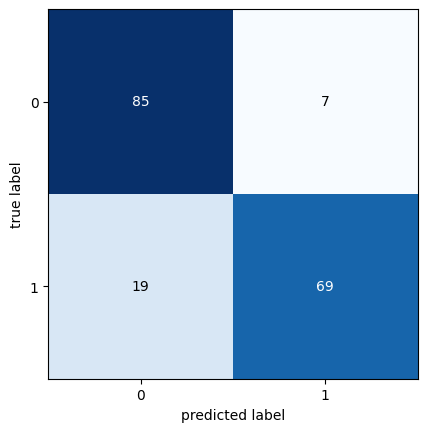

In [24]:
# print confusion matrix for LR training data
cm31 = confusion_matrix(Y_train,x_predt)
print(cm31)

# plot confusion matrix for LR training data
plot_confusion_matrix(cm31)
plt.show()

[[16  7]
 [ 7 16]]


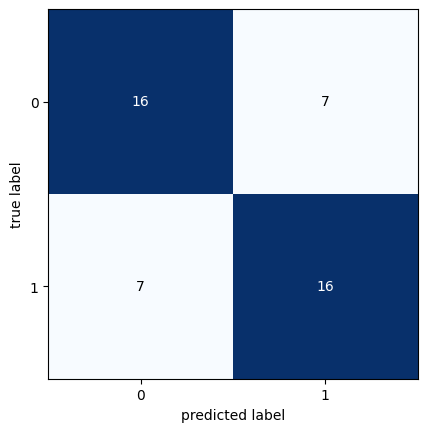

In [25]:
# print confusion matrix for LR test data
cm32 = confusion_matrix(Y_test,y_predt)
print(cm32)

# plot confusion matrix for LR test data
plot_confusion_matrix(cm32)
plt.show()

In [26]:
# Calculate precision
precision = cm32[0][0] / (cm32[0][0] + cm32[0][1])
print("Precision value of Logistic Regression:", precision)

# Calculate recall
recall = cm32[0][0] / (cm32[0][0] + cm32[1][0])
print("Recall value of Logistic Regression:", recall)

# Calculate F1 score
f1 = 2 * (precision * recall) / (precision + recall)
print("F1 Score value of Logistic Regression:", f1)

Precision value of Logistic Regression: 0.6956521739130435
Recall value of Logistic Regression: 0.6956521739130435
F1 Score value of Logistic Regression: 0.6956521739130435


In [27]:
from flask import Flask, render_template, request
import pickle
import numpy as np

# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import accuracy_score, classification_report


# Load the Random Forest CLassifier model
# filename = 'heart-disease-prediction-knn-model.pkl'
# model = pickle.load(open(filename, 'rb'))

app = Flask(__name__,template_folder=r'C:\Users\Olivia\Downloads\Project html\Traffic-Violation-Prediction-using-ML\templates')
@app.route('/')
def home():
    return render_template('main_int.html')

@app.route('/page1')
def home():
    return render_template('PROJECT_INTERFACE.html')

@app.route('/page2')
def home():
    return render_template('PROJECT_INTERFACE2.html')


@app.route('/predict', methods=['POST','GET'])
def predict():
    if request.method == 'POST':
        openness_1 = float(request.form['openness'] )
        conscientiousness_1 = float(request.form['conscientiousness'])
        extroversion_1 = float(request.form['extroversion'])
        agreeableness_1 = float(request.form['agreeableness'])
        neuroticism_1 = float(request.form['neuroticism'])
        anxietybasedperformancedeficits_1 = float(request.form['anxietybasedperformancedeficits'])
        exaggeratedsafetybehavior_1 = float(request.form['exaggeratedsafetybehavior'])
        hostilebehaviors_1 = float(request.form['hostilebehaviors'])
        # Gender_1 = int(request.form['Gender'])
        # Age_1 = int(request.form['Age'])
       
        
        data = np.array([[openness_1,conscientiousness_1,extroversion_1,agreeableness_1,neuroticism_1,anxietybasedperformancedeficits_1,exaggeratedsafetybehavior_1,hostilebehaviors_1]])
        # input_data = (3,3.67,6.33,5,2.67,4.57,3.71,3.57,1,1)

        # changing the input data to a numpy array
        # input_data_as_numpy_array = np.asarray(data)

        # reshape the data as we are predicting the label for only one instance

        # input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

        prediction = rf_Model.predict(data)
        print(prediction)

        if(prediction == 1).any():
          print('The person does not violates')

        else:
          print('The person violate')
         #         my_prediction = rf_Model.predict(data)
        #         print(my_prediction)

        #         if(prediction == 1):
        #           print('The person does not violates')
        #         elif(prediction == 2):
        #           print('The person may violate')
        #         else:
        #           print('The person violate')
                
        #         print('\nClassification Report\n', classification_report(y_test, data))
                
        return render_template('Interface2.html', prediction = prediction)
        #return 'None'
        
  
if __name__ == "__main__":
    app.run(debug=False)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [19/Jun/2023 16:07:05] "GET / HTTP/1.1" 200 -
C:\python\python 3.9.1\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
127.0.0.1 - - [19/Jun/2023 16:07:23] "POST /predict HTTP/1.1" 200 -


[2]
The person violate
